In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in orginal dataframe
gdp_df = pd.read_csv('../data/gdp_percapita.csv.csv')


# Q4

#Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
#looking at top 5 rows of the dataframe(df)
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [4]:
#looking at bottom 5 rows of the df
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


# Q5

In [5]:
#rows and columns
gdp_df.shape

(7662, 4)

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


### Answer : 4 columns, 7662 rows; data types are country - object; year - int; value and value footnotes - float

# Q6

In [7]:
#drop column with null values
gdp_df = gdp_df.drop(columns=['Value Footnotes'])

In [8]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


In [9]:
#rename columns
gdp_fn = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

#OR in the order of the column appearance
#gdp_fn.columns["Country","Year", "GDP_Per_Capita"]

# Q7

#ALTERNATE SOLUTIONS
#gives the unique count of the years .unique() lists the unique years
#gdp_fn['Year'].nunique()


#list the years
#gdp_fn['Year'].sort_values.unique().tolist()


#list the countries and counts how many times it appears in each year 
#gdp_fn['Country'].value_counts().reset_index()

#rename column index to coount
#count_df = gdp_fn['Country'].value_counts().reset_index(name='Counts')


#only grabs rows where count is 33
#count_df[count_df['count'==33]]


#only grabs rows where count is less than 33
#count_df[count_df['count'<33]]

In [10]:
#count each year data was collected per country
count_of_countries= gdp_df['Country or Area'].value_counts().reset_index(name='Counts')
print(count_of_countries)
print(count_of_countries.tail(50))

                                  Country or Area  Counts
0    Least developed countries: UN classification      33
1                      Middle East & North Africa      33
2         Middle East & North Africa (IDA & IBRD)      33
3                                   Middle income      33
4                                        Mongolia      33
..                                            ...     ...
237                                        Kosovo      15
238                     Sint Maarten (Dutch part)      14
239                      Turks and Caicos Islands      12
240                                       Somalia      10
241                                      Djibouti      10

[242 rows x 2 columns]
                                   Country or Area  Counts
192                                         France      33
193                                          Gabon      33
194                                        Albania      33
195                          Europe & Centra

In [11]:
#all_years: counts countries not missing data
all_years=count_of_countries[count_of_countries["Counts"]== 33].count()

#missing:counts countries with missing data
missing= count_of_countries[count_of_countries["Counts"]< 33].count()

#missing_names: lists countries with missing data
missing_names= count_of_countries[count_of_countries["Counts"]< 33]

print(missing)
print(all_years)
print(missing_names)

Country or Area    40
Counts             40
dtype: int64
Country or Area    202
Counts             202
dtype: int64
               Country or Area  Counts
202                    Hungary      32
203                    Lebanon      32
204                      Aruba      32
205                      Tonga      32
206                     Bhutan      32
207            Slovak Republic      31
208                     Kuwait      31
209               Turkmenistan      31
210                   Cambodia      30
211         West Bank and Gaza      29
212     Bosnia and Herzegovina      29
213                     Latvia      28
214                     Israel      28
215                    Estonia      28
216                     Serbia      28
217                  Lithuania      28
218                    Iceland      28
219                    Moldova      28
220                   Maldives      28
221                    Croatia      28
222                   Slovenia      28
223               Small st

#### Answer: 202 countries have data for all the years

# Q8

In [12]:
d2020=gdp_df[gdp_df["Year"]==2020]
print(d2020)

                  Country or Area  Year         Value
1                     Afghanistan  2020   1968.341002
22    Africa Eastern and Southern  2020   3455.023119
55     Africa Western and Central  2020   3957.933804
88                        Albania  2020  13278.369769
121                       Algeria  2020  10844.770764
...                           ...   ...           ...
7503                     Viet Nam  2020  10450.622382
7536           West Bank and Gaza  2020   5402.538773
7565                        World  2020  16204.169107
7598                       Zambia  2020   3183.650773
7631                     Zimbabwe  2020   1990.319419

[242 rows x 3 columns]


C:\Users\ronej\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


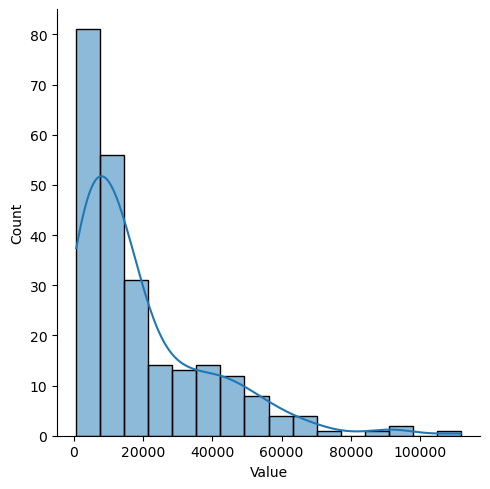

In [13]:
#histogram
sns.displot(data=d2020["Value"], kde=True)

(array([111.,  60.,  24.,  19.,  15.,   5.,   4.,   1.,   2.,   1.]),
 array([   711.35526342,  11815.35121222,  22919.34716101,  34023.3431098 ,
         45127.3390586 ,  56231.33500739,  67335.33095619,  78439.32690498,
         89543.32285377, 100647.31880257, 111751.31475136]),
 <BarContainer object of 10 artists>)

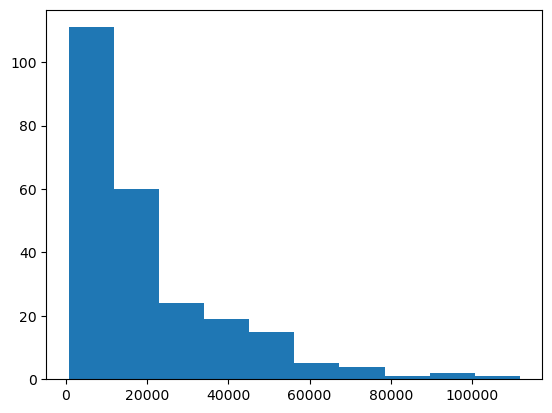

In [14]:
#histogram using matplotlib
plt.hist(d2020.Value)

#### From histogram, GDP per capita distribution in 2020 is skewed 

C:\Users\ronej\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Value', ylabel='Density'>

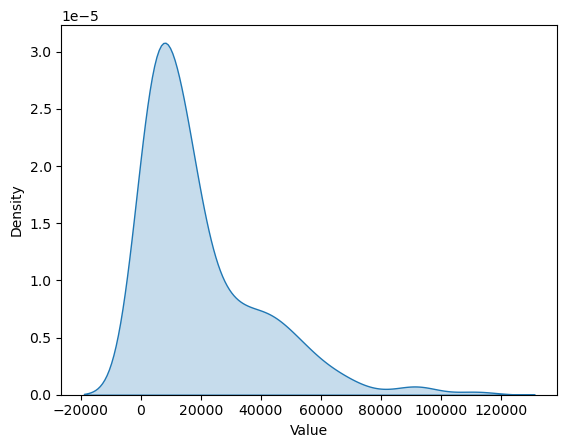

In [15]:
#density plot
sns.kdeplot(d2020['Value'],fill=True)

#### Most countries had a GDP per capita less than 20,000 in 2020

# Boxplot

<Axes: xlabel='Year', ylabel='Value'>

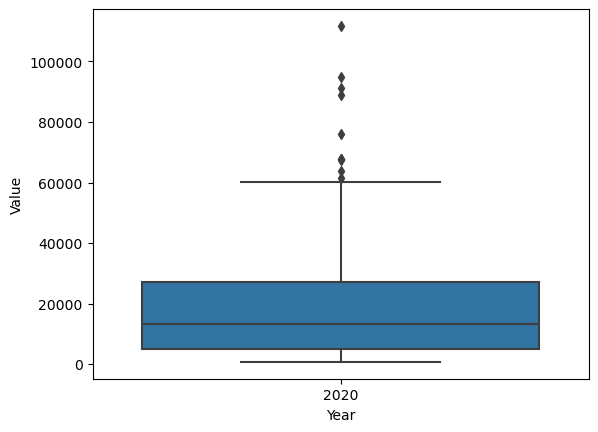

In [16]:
#boxplot
sns.boxplot(x=d2020["Year"], y=d2020["Value"])

#### Some countries had such a high GDP per capita in 2020 (outliers), that they would need to be excluded from analysis of GDP per capita for all the countries in 2020.

# Violin plot

<Axes: xlabel='Year', ylabel='Value'>

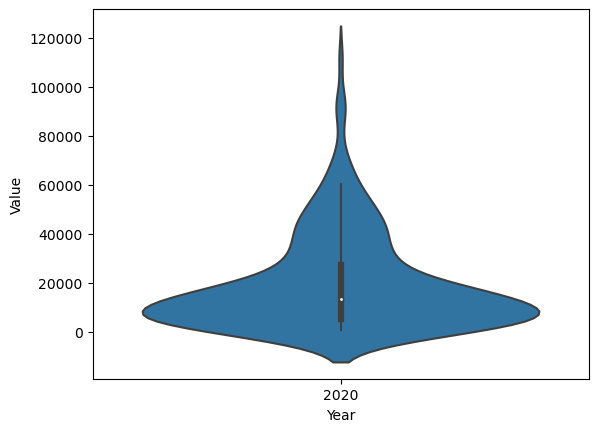

In [17]:
#violin plot of 2020 GDP per capita
sns.violinplot(x=d2020["Year"], y=d2020["Value"])
#sns.violinplot(d2020)

# Q9

In [18]:
#median GDP per capita value in 2020
med_gdp_2020= gdp_df[gdp_df["Year"]==2020]["Value"].median()
print(med_gdp_2020)

13357.997573370474


#### Answer: Median GDP per capita value in 2020 - 13,358

In [19]:
# display min, max
#all_gdp_2020= d2020[d2020["Value"]].agg([min,max])

# Q10

In [20]:
#subsetting data to only include the years 1990, 2000, 2010, and 2020 
years=[1990,2000,2010,2020]
gdp_decades=gdp_fn[gdp_fn["Year"].isin(years)]
print(gdp_decades)

                          Country  Year  GDP_Per_Capita
1                     Afghanistan  2020     1968.341002
11                    Afghanistan  2010     2026.163818
22    Africa Eastern and Southern  2020     3455.023119
32    Africa Eastern and Southern  2010     3513.315920
42    Africa Eastern and Southern  2000     2897.140841
...                           ...   ...             ...
7628                       Zambia  1990     2290.039226
7631                     Zimbabwe  2020     1990.319419
7641                     Zimbabwe  2010     1799.540233
7651                     Zimbabwe  2000     2750.601236
7661                     Zimbabwe  1990     2704.757299

[921 rows x 3 columns]


In [21]:
# another solution for decades
gdp_fn_ind= gdp_fn.set_index("Year")
#gdp_fn_ind.reset_index()
dec= gdp_fn_ind.reset_index(drop=True)

decs2= gdp_fn_ind.loc[[1990, 2000, 2010, 2020]]


print(dec)

          Country  GDP_Per_Capita
0     Afghanistan     1517.016266
1     Afghanistan     1968.341002
2     Afghanistan     2079.921861
3     Afghanistan     2060.698973
4     Afghanistan     2096.093111
...           ...             ...
7657     Zimbabwe     2670.106615
7658     Zimbabwe     2458.783255
7659     Zimbabwe     2468.278257
7660     Zimbabwe     2781.787843
7661     Zimbabwe     2704.757299

[7662 rows x 2 columns]


# Boxplot


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

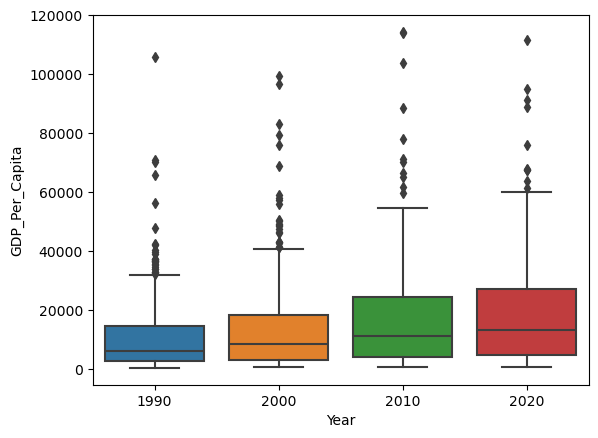

In [22]:
sns.boxplot(x ="Year", y="GDP_Per_Capita", data=gdp_decades)

# Barplot


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

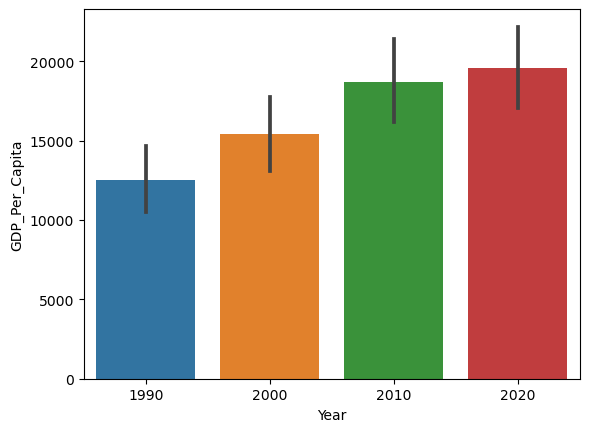

In [23]:
#bar plot
#plt.bar(gdp_decades.Year,gdp_decades.GDP_Per_Capita)---- didn't work/looks odd
sns.barplot(x ="Year", y="GDP_Per_Capita", data=gdp_decades)


# Scatterplot 

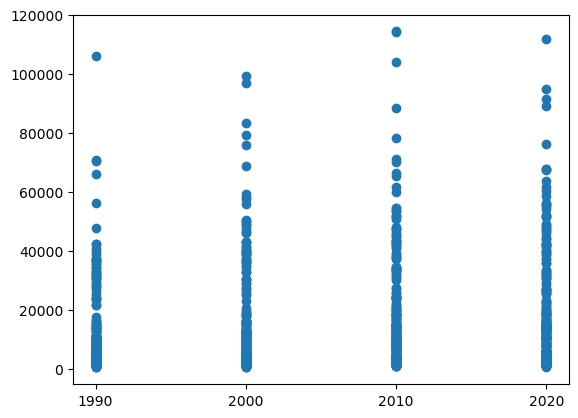

In [24]:
#plt.scatter(gdp_decades.Year,gdp_decades.GDP_Per_Capita)
plt.plot('Year','GDP_Per_Capita', data=gdp_decades, linestyle= 'none', marker= 'o')
#changed x-axis increment below to only display years in my decades variable
plt.xticks(np.arange(1990, 2030, step =10))
plt.show()

# Scatterplot with a trend line

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

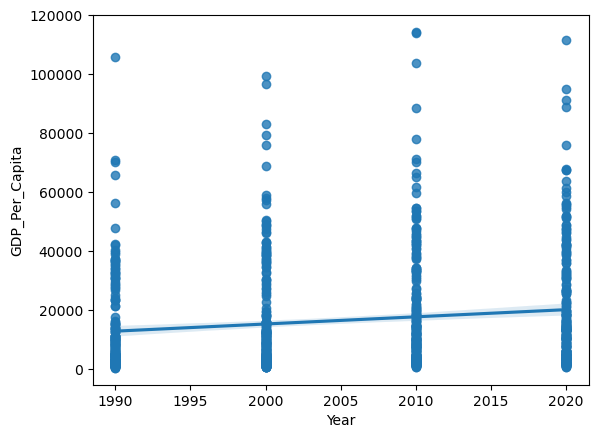

In [25]:
#scratteplot with trendline
#plt.scatter(gdp_decades.Year,gdp_decades.GDP_Per_Capita)
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

#gdp_decades.plot.scatter('Year','GDP_Per_Capita',grid= False)

#### Answer: From 1990 to 2000, it seems one country experienced a drop in GDP per capita, while as a whole, GDP per capita over time from 1990 was.  There is a bit of a drop seen in 2020, most likely related to COVID-19.

# Q11 

In [26]:
# first country to have a GDP per capita greater than $100,000
#solution 1
over1k= gdp_fn[gdp_fn["GDP_Per_Capita"]>= 100000]
over1k.sort_values(by=['Year'], ascending =True)

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


In [27]:
# first country to have a GDP per capita greater than $100,000
#solution 2
gdp_fn.sort_values(by=['Year','GDP_Per_Capita'],ascending=([True, False]))

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
4178,Luxembourg,1990,70860.819124
904,Brunei,1990,70358.724094
711,Bermuda,1990,65961.406278
6775,Switzerland,1990,56232.026080
...,...,...,...
4822,Mozambique,2022,1243.073638
6271,Somalia,2022,1155.275773
1628,Dem. Rep. Congo,2022,1132.654233
1215,Central African Republic,2022,819.192343


#### Answer: United Arab Emirates in 1990 was the first country to have a GDP per capita greater than 100,000

# Q12

In [28]:
# add country name

#max GDP per capita value in 2020
max_gdp_2020= gdp_fn[gdp_fn["Year"]==2020]
max_gdp_2020.sort_values(by =['GDP_Per_Capita'],ascending=False).head(1)

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


#### Answer: Luxembourg has the highest GDP per capita in 2020

In [29]:
lux= gdp_fn[gdp_fn["Country"]=="Luxembourg"]
#sns.barplot(x ="Year", y="GDP_Per_Capita", data=lux)

# Plot showing Luxembourg's GDP per capita over time

In [30]:
#Luxemborg GDP per capita over time  
# highest GDP in 2007
#scatterplot with trend line
#sns.regplot(x=lux["Year"], y=lux["GDP_Per_Capita"])

C:\Users\ronej\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronej\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


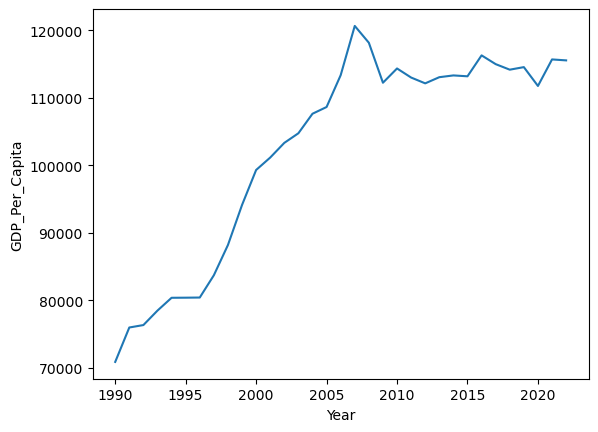

In [31]:
sns.lineplot(data=lux, x="Year", y="GDP_Per_Capita");

In [32]:
#not a good plot to represent this
#sns.violinplot(x=lux["Year"], y=lux["GDP_Per_Capita"])

# Q 13

In [33]:
# add country name
#Burundi
#min GDP per capita value in 2020
min_gdp_2020= gdp_fn[gdp_fn["Year"]==2020]
min_gdp_2020.sort_values(by =['GDP_Per_Capita'],ascending=True)

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556
...,...,...,...
681,Bermuda,2020,76117.804744
5746,Qatar,2020,89019.069857
3279,Ireland,2020,91356.855054
6108,Singapore,2020,94910.101431


#### Burundi's GDP per capita over time

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

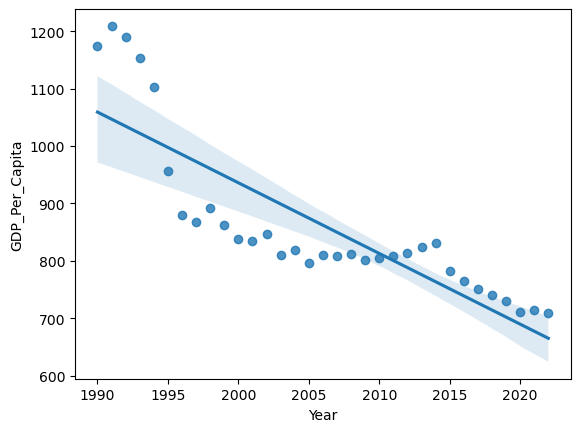

In [34]:
bur= gdp_fn[gdp_fn["Country"]=="Burundi"]

sns.regplot(x=bur["Year"], y=bur["GDP_Per_Capita"])

# Bonus

In [35]:
min_gdp_1990= gdp_fn[gdp_fn["Year"]==1990]
min_gdp_1990.sort_values(by =['GDP_Per_Capita'],ascending=True)


,Country,Year,GDP_Per_Capita
4854,Mozambique,1990,460.123697
4887,Myanmar,1990,581.613311
2127,Ethiopia,1990,767.170419
7236,Uganda,1990,901.660809
5865,Rwanda,1990,933.013443
...,...,...,...
6775,Switzerland,1990,56232.026080
711,Bermuda,1990,65961.406278
904,Brunei,1990,70358.724094
4178,Luxembourg,1990,70860.819124


In [36]:
# how to merge 2 data frames: mergedStuff = pd.merge(df1, df2, on=['Name'], how='inner')

#not right
less= min_gdp_1990["GDP_Per_Capita"]> min_gdp_2020["GDP_Per_Capita"]

In [37]:
#inner join
mergedy = min_gdp_1990.merge(min_gdp_2020, on = ['Country'], how='inner')


# Countries with lower GDP per capita in 2020 than 1990

In [38]:
# countries with lower GDP per capita in 2020 than in 1990
mergedy[mergedy['GDP_Per_Capita_x']> mergedy['GDP_Per_Capita_y']]

,Country,Year_x,GDP_Per_Capita_x,Year_y,GDP_Per_Capita_y
15,Barbados,1990,14097.395550,2020,13805.777541
25,Brunei,1990,70358.724094,2020,61603.550804
28,Burundi,1990,1175.155086,2020,711.355263
34,Central African Republic,1990,1200.613390,2020,847.765012
41,Congo,1990,5007.319245,2020,3384.654335
45,Dem. Rep. Congo,1990,1750.169739,2020,1044.071214
66,Fragile and conflict affected situations,1990,4864.814075,2020,4357.621312
68,Gabon,1990,17559.006114,2020,13903.288955
76,Guinea-Bissau,1990,1998.173206,2020,1803.630591
78,Haiti,1990,3612.815105,2020,2970.462845


#### Answer: It is true that in general, countries had a higher GDP per capita in 2020 than in 1990

# Q14

In [39]:
#read in internet dataframe footnotes at the bottom of the csv file needed to be ignored by limiting what row it reads until
internet_df = pd.read_csv('../data/internet_use.csv.csv',nrows=4495)

#datatypes and structure of dataframe
#internet_df.info()
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


# Q15

In [40]:
# drop a column and rename 2 columns
a = internet_df.drop(columns=['Value Footnotes'])
print(a)

intdf= a.rename(columns={'Country or Area': 'Country', 'Value':'Internet_Users_Pct'})
print(intdf)

     Country or Area  Year     Value
0        Afghanistan  2014  6.390000
1        Afghanistan  2013  5.900000
2        Afghanistan  2012  5.454545
3        Afghanistan  2011  5.000000
4        Afghanistan  2010  4.000000
...              ...   ...       ...
4490        Zimbabwe  1997  0.033080
4491        Zimbabwe  1996  0.016790
4492        Zimbabwe  1995  0.007684
4493        Zimbabwe  1994  0.001739
4494        Zimbabwe  1990  0.000000

[4495 rows x 3 columns]
          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
...           ...   ...                 ...
4490     Zimbabwe  1997            0.033080
4491     Zimbabwe  1996            0.016790
4492     Zimbabwe  1995            0.007684
4493     Zimbabwe  1994            0.001739
4494     Zimbabwe  1990            0.000000

[4

# Q16 

In [41]:
count_of_countryobs= intdf['Country'].value_counts().reset_index(name='Counts')
print(count_of_countryobs.head(60))


             Country  Counts
0           Thailand      43
1              Syria      43
2               Togo      43
3           Maldives      43
4            Grenada      43
5            Burundi      43
6           Botswana      40
7              Nepal      26
8             Greece      25
9     United Kingdom      25
10   Korea (Rep. of)      25
11            Brazil      25
12           Germany      25
13     United States      25
14            Canada      25
15             Spain      25
16          Portugal      25
17            France      25
18           Finland      25
19            Poland      25
20      South Africa      25
21       Switzerland      25
22           Belgium      25
23             Japan      25
24             Italy      25
25            Israel      25
26           Ireland      25
27       Netherlands      25
28            Sweden      25
29         Singapore      25
30            Mexico      25
31           Austria      25
32           Denmark      25
33           I

#### Answer: Have data extending back to 1960, but no values in Internet_Users_Pct until 1990. Country count is not a reflection of internet usage

# Q17

In [42]:
nonzero= intdf[intdf.Internet_Users_Pct >0]

sort= nonzero.sort_values(["Year","Internet_Users_Pct"] , ascending=[True, True])
#print(nonzero)
#print(sort.head(60))

####  Answer: Belgium in 1990 (0.001007), but Australia in 1991 with a value of 1.097204 which is the first number greater than 0

# Q18 

In [43]:
# set equal to 2000 and 2014
i2000= intdf[intdf["Year"]==2000]
i2014= intdf[intdf["Year"]==2014]

          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
15        Albania  2014           60.100000
29        Albania  2000            0.114097
36        Algeria  2014           18.090000
50        Algeria  2000            0.491706
...           ...   ...                 ...
4445        Yemen  2000            0.082500
4451       Zambia  2014           17.340000
4465       Zambia  2000            0.191072
4473     Zimbabwe  2014           19.890000
4487     Zimbabwe  2000            0.401434

[401 rows x 3 columns]


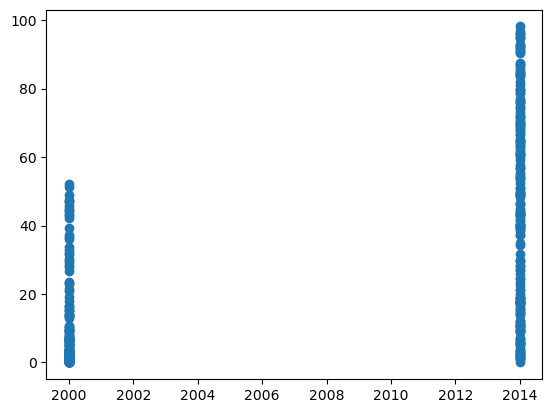

In [44]:
years=[2000,2014]
intdist=intdf[intdf["Year"].isin(years)]
print(intdist)

plt.scatter(intdist.Year, intdist.Internet_Users_Pct)
plt.show()

<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

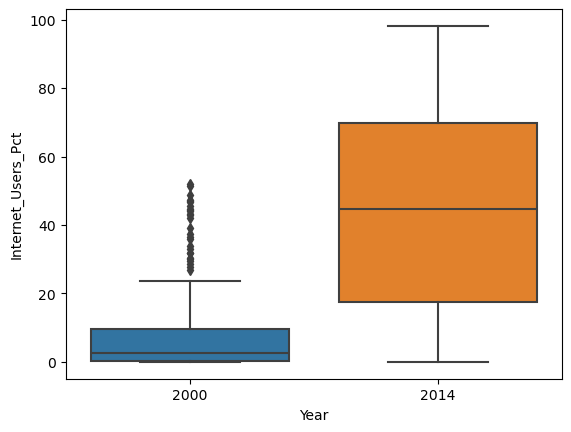

In [45]:
sns.boxplot(x=intdist['Year'], y= intdist['Internet_Users_Pct'])

#### More internet usage in 2014 (higher percentage of users)

# Q19 

In [46]:
#For how many countries was the percentage of internet users below 5% in 2014?
#i2014=intdf[intdf["Internet_Users_Pct"]<5]

i2014=intdf[intdf["Year"]==2014]

#i2014

#count=i2014["Country"].value_counts().reset_index(name='Counts')
#print(count)

#change i2014 to include Internet user column
bel5= i2014[i2014["Internet_Users_Pct"]<5]
row_count= bel5.shape[0]
print(row_count)

16


#### Answer: 16 countries

# Q20

In [47]:
#how to merge 2 data frames: mergedStuff = pd.merge(df1, df2, on=['Name'], how='inner')
#mergedy = min_gdp_1990.merge(min_gdp_2020, on = ['Country'], how='inner')
# year x correlates to internetdf and year y to GDPdf
#gdp_and_internet_use = intdf.merge(gdp_fn, on =['Country'], how='outer')
#gdp_and_internet_use

gdp_and_internet_use= pd.merge(left=gdp_fn, right=intdf, how= 'outer')
gdp_and_internet_use


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
8731,Yemen,1999,NaN,0.056629
8732,Yemen,1998,NaN,0.023323
8733,Yemen,1997,NaN,0.015025
8734,Yemen,1996,NaN,0.000621


# Q21

In [48]:
#gdp_and_internet_use[gdp_and_internet_use[Internet_Users_Pct].value_sort
gdpint2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]
#Co= gdp_and_internet_use[gdp_and_internet_use["Year"]==2014]
Co = gdpint2014.sort_values(['Internet_Users_Pct'], ascending= False).head(3)
Co

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2993,Iceland,2014,50450.741612,98.16
687,Bermuda,2014,77361.104881,96.80
5212,Norway,2014,62838.515727,96.30


#### Answer: Iceland, Bermuda and Norway

In [49]:
# cereate list pof 3 countries
Co['Country'].tolist()

['Iceland', 'Bermuda', 'Norway']

C:\Users\ronej\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronej\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronej\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronej\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

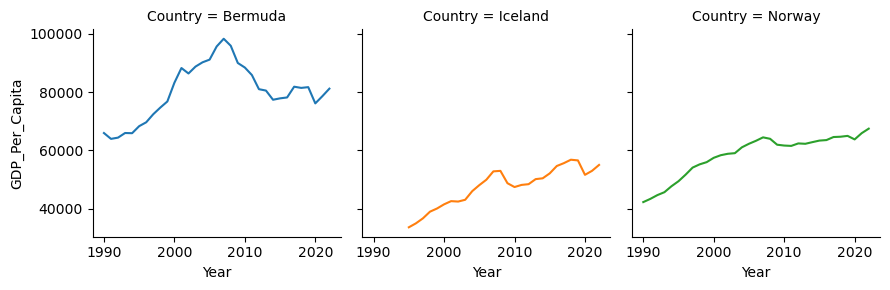

In [50]:
gr= sns.FacetGrid(gdp_and_internet_use[gdp_and_internet_use['Country'].isin(Co['Country'].tolist())],col="Country", hue= "Country")
gr.map_dataframe(sns.lineplot, x="Year", y="GDP_Per_Capita")

# Q22

In [51]:
gdp_and_internet_use_2014= gdp_and_internet_use[(gdp_and_internet_use["Year"]==2014)]
gdp_and_internet_use_2014.sort_values(['Internet_Users_Pct'], ascending= False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2993,Iceland,2014,50450.741612,98.16
687,Bermuda,2014,77361.104881,96.80
5212,Norway,2014,62838.515727,96.30
1669,Denmark,2014,52048.335493,95.99
7665,Andorra,2014,NaN,95.90
...,...,...,...,...
7167,Turks and Caicos Islands,2014,24661.145053,NaN
7179,Tuvalu,2014,3521.328676,NaN
7377,Upper middle income,2014,14063.487284,NaN
7542,West Bank and Gaza,2014,5967.073437,NaN


# Q23  

<Axes: xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

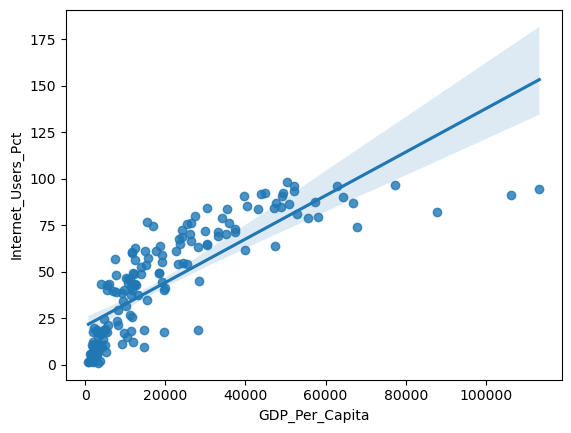

In [52]:

sns.regplot(x=gdp_and_internet_use_2014["GDP_Per_Capita"], y=gdp_and_internet_use_2014["Internet_Users_Pct"])


#### The percentage of internet users increased from the lowest GDP per capita, up to about 65,000 GDP per capita, then the number of internet users dropped then starts to pick up again at over 100,000 GDP per capita

#toplt = gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['Country']]
#plt.plot(toplt['Internet_Users_Pct'], toplt['GDP_Per_Capita'], label=country)

# Q24

In [53]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014["GDP_Per_Capita"], q= 3, labels=["Low", "Medium", "High"])

C:\Users\ronej\AppData\Local\Temp\ipykernel_23272\3934855166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014["GDP_Per_Capita"], q= 3, labels=["Low", "Medium", "High"])


In [54]:
#pd.qcut(gdp_and_internet_use_2014["GDP_Per_Capita"], q= 3, labels=["Low", "Medium", "High"])

In [55]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
7,Afghanistan,2014,2144.449634,6.39,Low
28,Africa Eastern and Southern,2014,3642.875373,NaN,Low
61,Africa Western and Central,2014,4146.994622,NaN,Low
94,Albania,2014,11586.817446,60.10,Medium
127,Algeria,2014,11561.259795,18.09,Medium
...,...,...,...,...,...
8589,T.F.Y.R. Macedonia,2014,NaN,68.06,NaN
8647,Turkey,2014,NaN,51.04,NaN
8670,Venezuela,2014,NaN,57.00,NaN
8694,Virgin Islands (U.S.),2014,NaN,50.07,NaN
